# SIPRI MIlitary Expenditure dataset

## Carrie Little

### Import Necessary Libraries

In [1]:
# Import All Necessary Libraries
import numpy as np                   
import pandas as pd   
from pathlib import Path
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats          
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Dataset
from pathlib import Path
import pandas as pd

# Define the file path
file_path = Path("..") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv"     # Suitable for within Github repository
# file_path = 'Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'                         # for when working in same directory

# Load the CSV file
df = pd.read_csv(file_path)
                       
df.head()                                                                  

,Country,Year,Expenditure-Share_of_Govt_spending,Expenditure-Share_of_GDP,Expenditure_Per_Capita,Expenditure_Constant_2022,Region,Subregion,index_level,total_rank_from_avg_rank,...,total_score_rank,Deadliness_raw,Diffusion_raw,Danger_raw,Fragmentation_raw,Deadliness_scaled,Diffusion_scaled,Danger_scaled,Fragmentation_scaled,total_score
0,Brazil,2000,NaN,0.017307,64.500907,15643.43168,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
1,Brazil,2001,0.047167,0.019519,61.332747,18119.43481,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
2,Brazil,2002,0.041112,0.018958,53.550103,18361.33076,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
3,Brazil,2003,0.035175,0.015035,45.956041,14647.82954,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
4,Brazil,2004,0.035561,0.014613,52.945029,15219.74744,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851


### Descriptive statistics

In [3]:
# Descriptive Information
# Columns
columns = df.info()                                                         # Create a Dataframe of Descriptive Statistics
columns                                                                    # Display the Dataframe of Descriptive Statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             3716 non-null   object 
 1   Year                                3716 non-null   int64  
 2   Expenditure-Share_of_Govt_spending  3533 non-null   float64
 3   Expenditure-Share_of_GDP            3602 non-null   float64
 4   Expenditure_Per_Capita              3604 non-null   float64
 5   Expenditure_Constant_2022           3673 non-null   float64
 6   Region                              3716 non-null   object 
 7   Subregion                           3716 non-null   object 
 8   index_level                         3716 non-null   int64  
 9   total_rank_from_avg_rank            3716 non-null   int64  
 10  avg_rank                            3716 non-null   float64
 11  Deadliness_rank                     3716 no

In [4]:
# Descriptive Statistics
# Describe
summary_stats = df.describe()                                                         # Create a Dataframe of Descriptive Statistics
summary_stats                                                                         # Display the Dataframe of Descriptive Statistics

,Year,Expenditure-Share_of_Govt_spending,Expenditure-Share_of_GDP,Expenditure_Per_Capita,Expenditure_Constant_2022,index_level,total_rank_from_avg_rank,avg_rank,Deadliness_rank,Diffusion_rank,...,total_score_rank,Deadliness_raw,Diffusion_raw,Danger_raw,Fragmentation_raw,Deadliness_scaled,Diffusion_scaled,Danger_scaled,Fragmentation_scaled,total_score
count,3716.000000,3533.000000,3602.000000,3604.000000,3673.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,...,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000
mean,2011.556512,0.071187,0.019767,243.374084,11760.889052,3.491119,86.736006,71.252758,79.672497,43.389397,...,80.705867,918.312971,0.005629,252.864101,17.972282,0.022999,0.008146,0.039034,0.011832,0.081966
std,6.889732,0.060611,0.018137,426.197550,68296.745904,0.894834,49.421439,33.403444,40.775882,13.511428,...,42.837423,3629.622878,0.023324,710.539730,107.454813,0.090902,0.033754,0.109685,0.070740,0.231303
min,2000.000000,0.000672,0.000163,0.071803,0.000000,1.000000,2.000000,4.250000,2.000000,2.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.031740,0.010229,17.077744,144.314628,3.000000,45.000000,42.750000,43.000000,37.000000,...,45.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000309,0.000000,0.001000
50%,2012.000000,0.051833,0.014996,69.809759,739.329049,4.000000,85.000000,76.500000,84.000000,51.000000,...,81.000000,7.000000,0.000000,13.000000,2.000000,0.000175,0.000000,0.002007,0.001317,0.005000
75%,2018.000000,0.091994,0.023754,270.439168,4523.330790,4.000000,131.000000,101.000000,125.000000,51.000000,...,117.000000,246.000000,0.001000,152.000000,9.000000,0.006161,0.001447,0.023464,0.005925,0.037000
max,2023.000000,0.581707,0.366531,5718.771025,990485.412100,4.000000,160.000000,114.750000,125.000000,51.000000,...,136.000000,37014.000000,0.176000,5426.000000,1519.000000,0.926995,0.254703,0.837604,1.000000,1.940000


### Histogram

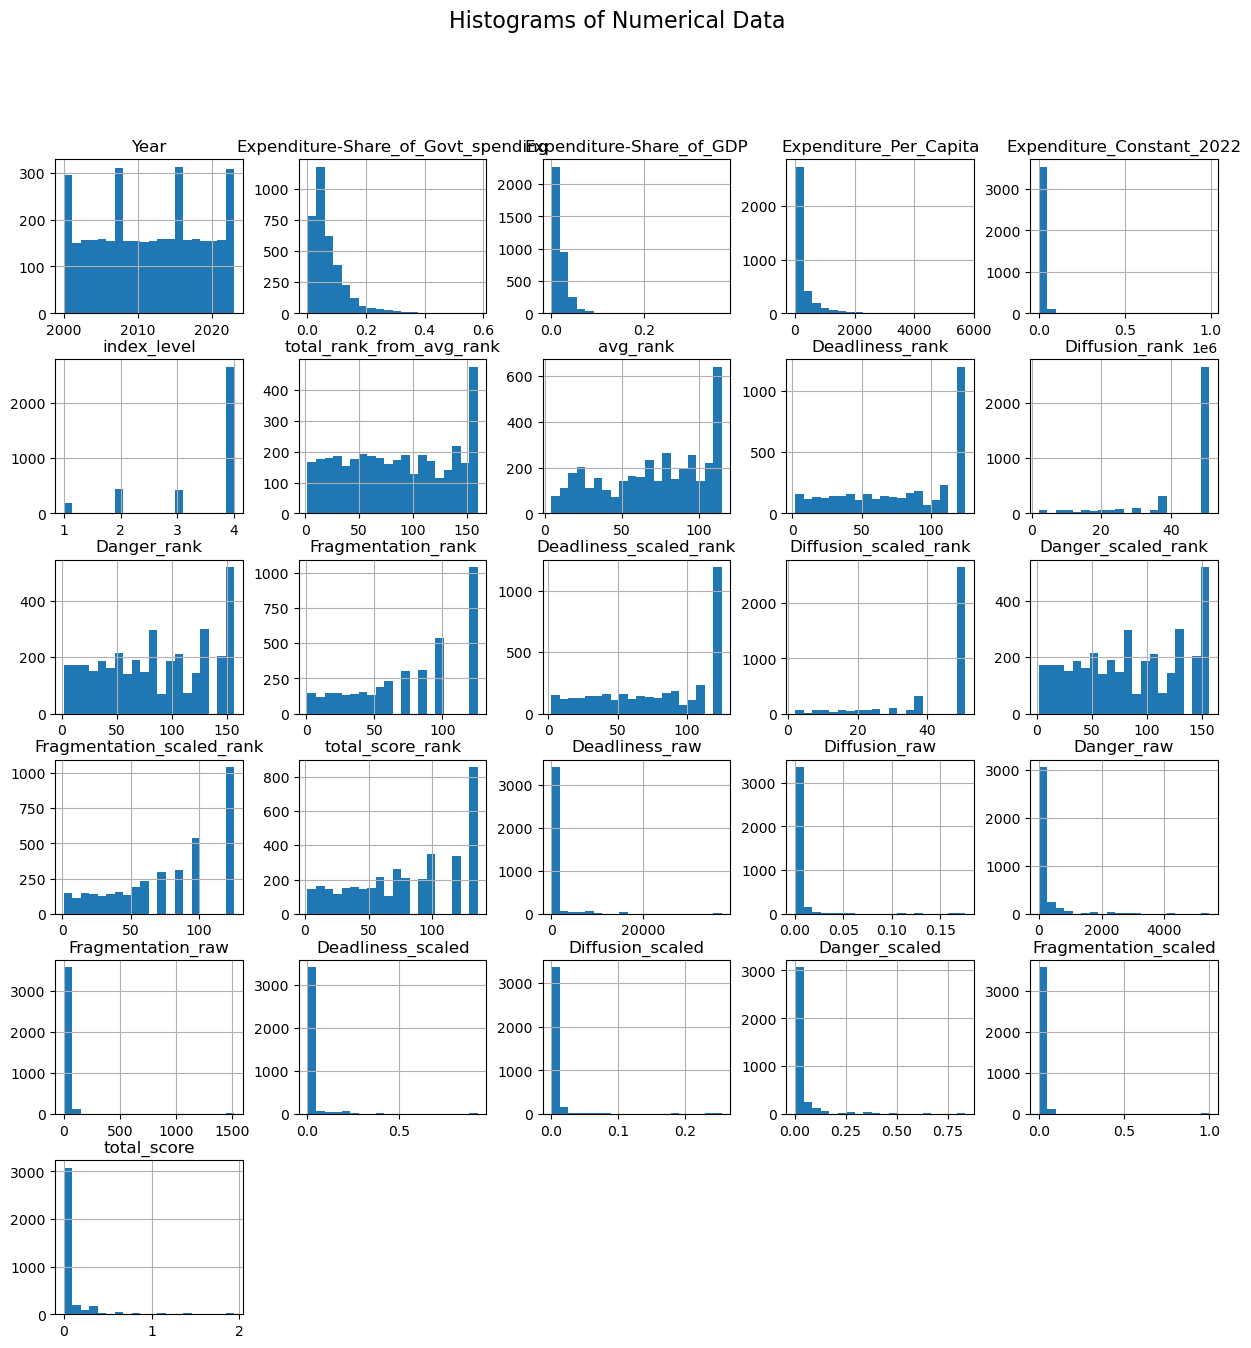

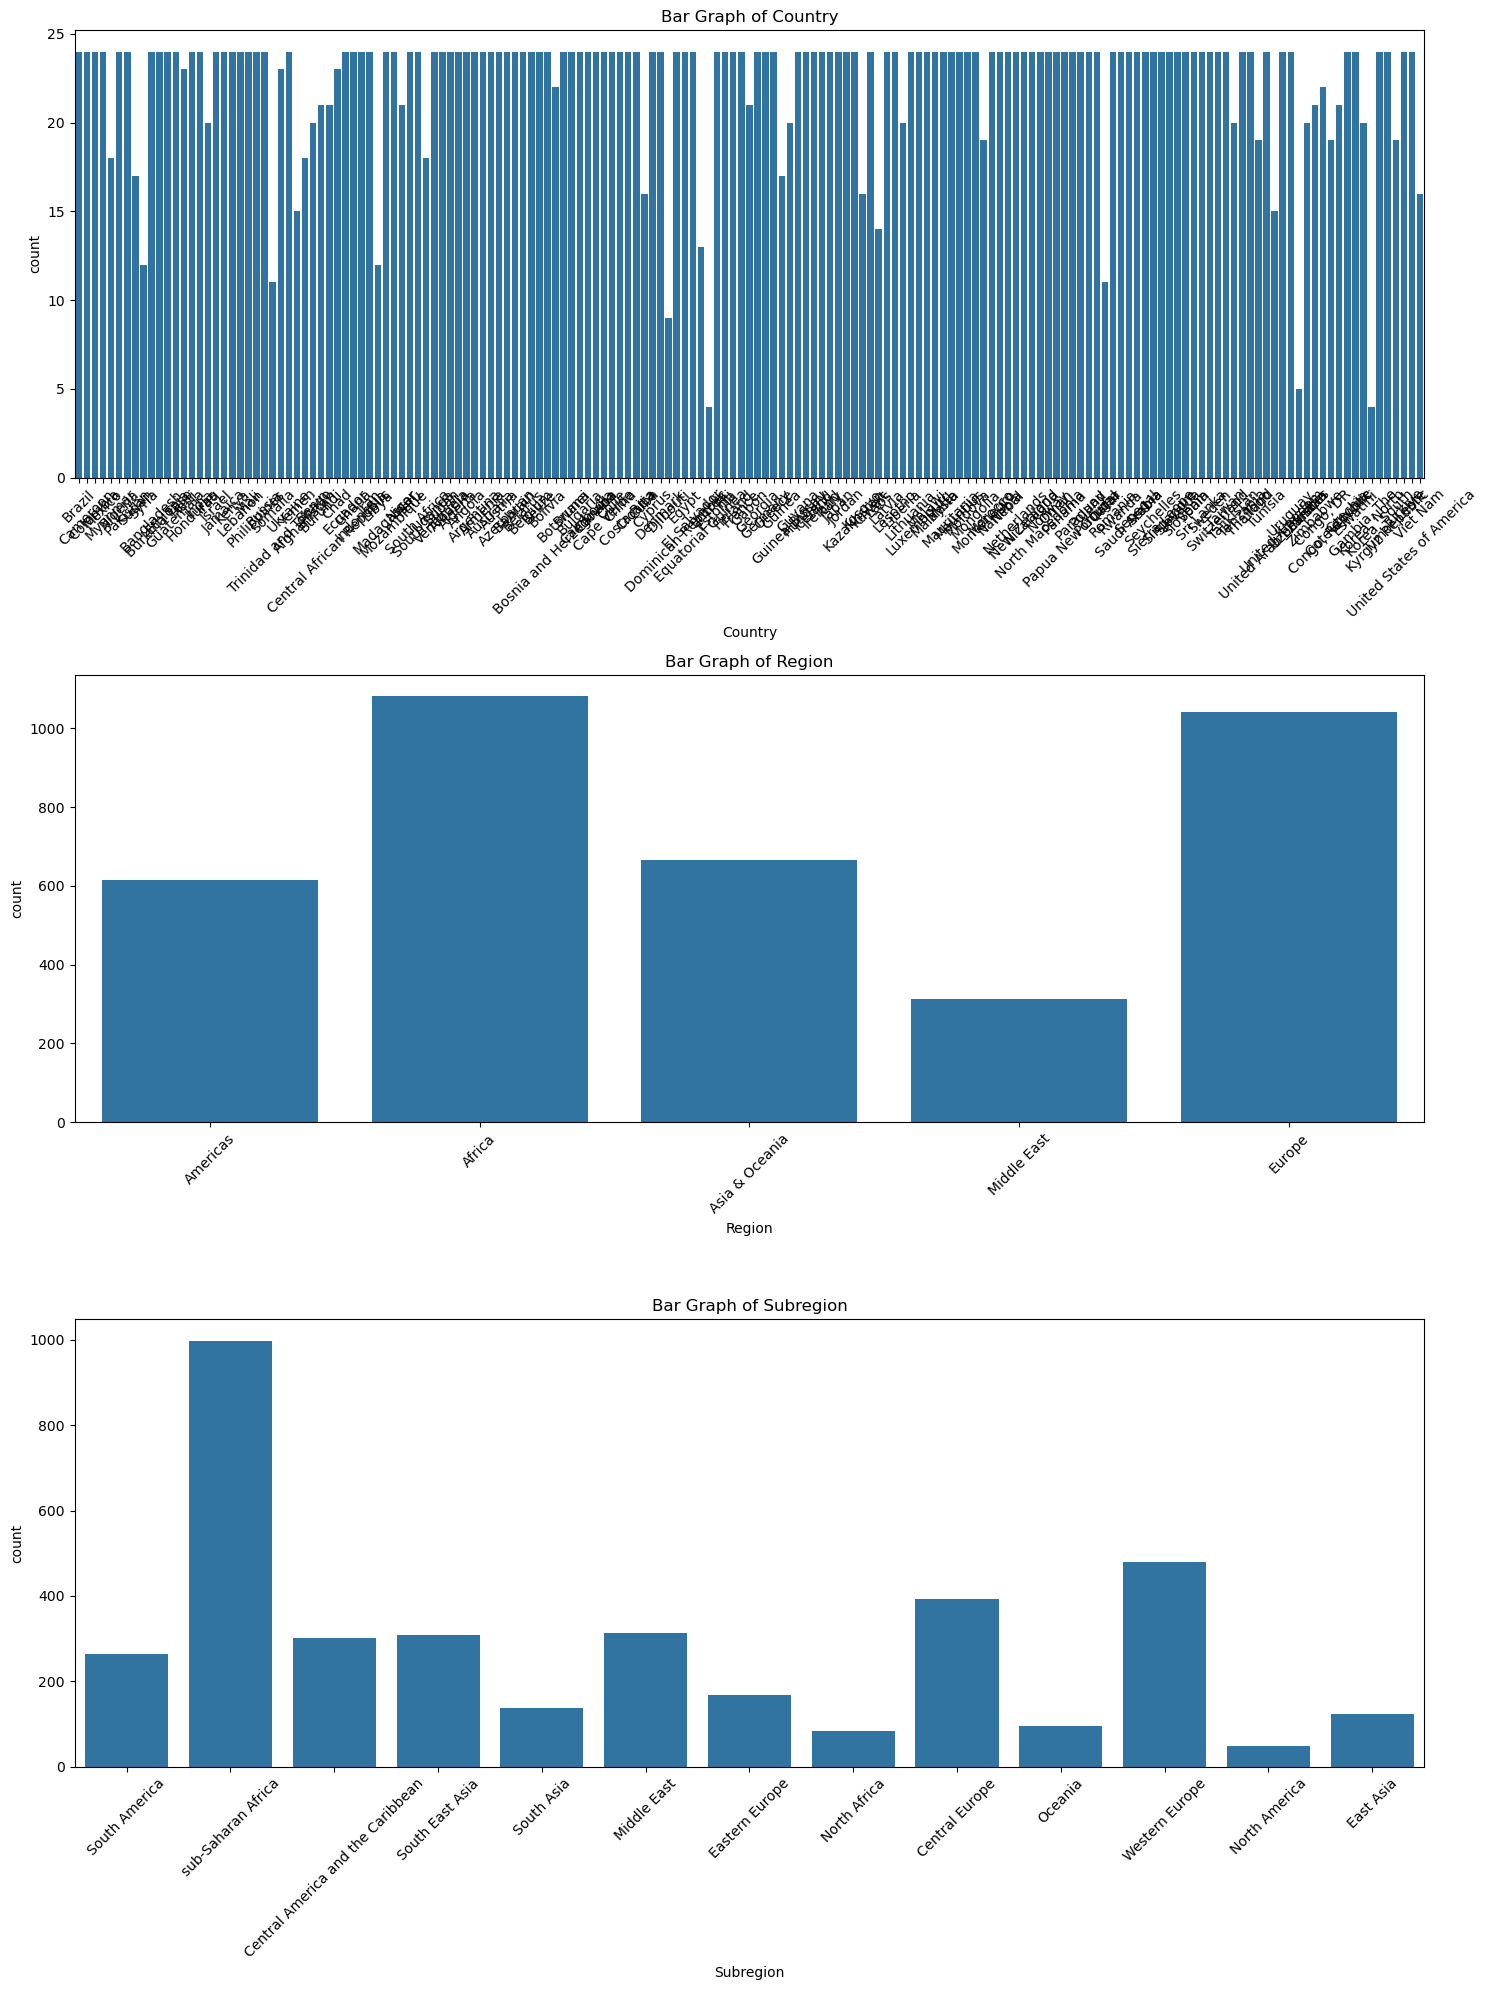

Country                                 0
Year                                    0
Expenditure-Share_of_Govt_spending    183
Expenditure-Share_of_GDP              114
Expenditure_Per_Capita                112
Expenditure_Constant_2022              43
Region                                  0
Subregion                               0
index_level                             0
total_rank_from_avg_rank                0
avg_rank                                0
Deadliness_rank                         0
Diffusion_rank                          0
Danger_rank                             0
Fragmentation_rank                      0
Deadliness_scaled_rank                  0
Diffusion_scaled_rank                   0
Danger_scaled_rank                      0
Fragmentation_scaled_rank               0
total_score_rank                        0
Deadliness_raw                          0
Diffusion_raw                           0
Danger_raw                              0
Fragmentation_raw                 

In [5]:
# Data Preprocessing and Summary Statistics

# Checking for missing values
missing_values = df.isnull().sum()

# Summary statistics for numerical data
summary_statistics = df.describe()

# Viewing the columns for a better understanding of categorical vs numerical data
df_columns = df.columns

# Plotting histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Numerical Data', size=16)
plt.show()

# Plotting bar graphs for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=45)
    plt.title(f'Bar Graph of {column}')

plt.tight_layout()
plt.show()

# Display summary statistics 
summary_statistics

# Displaying missing values information
missing_values


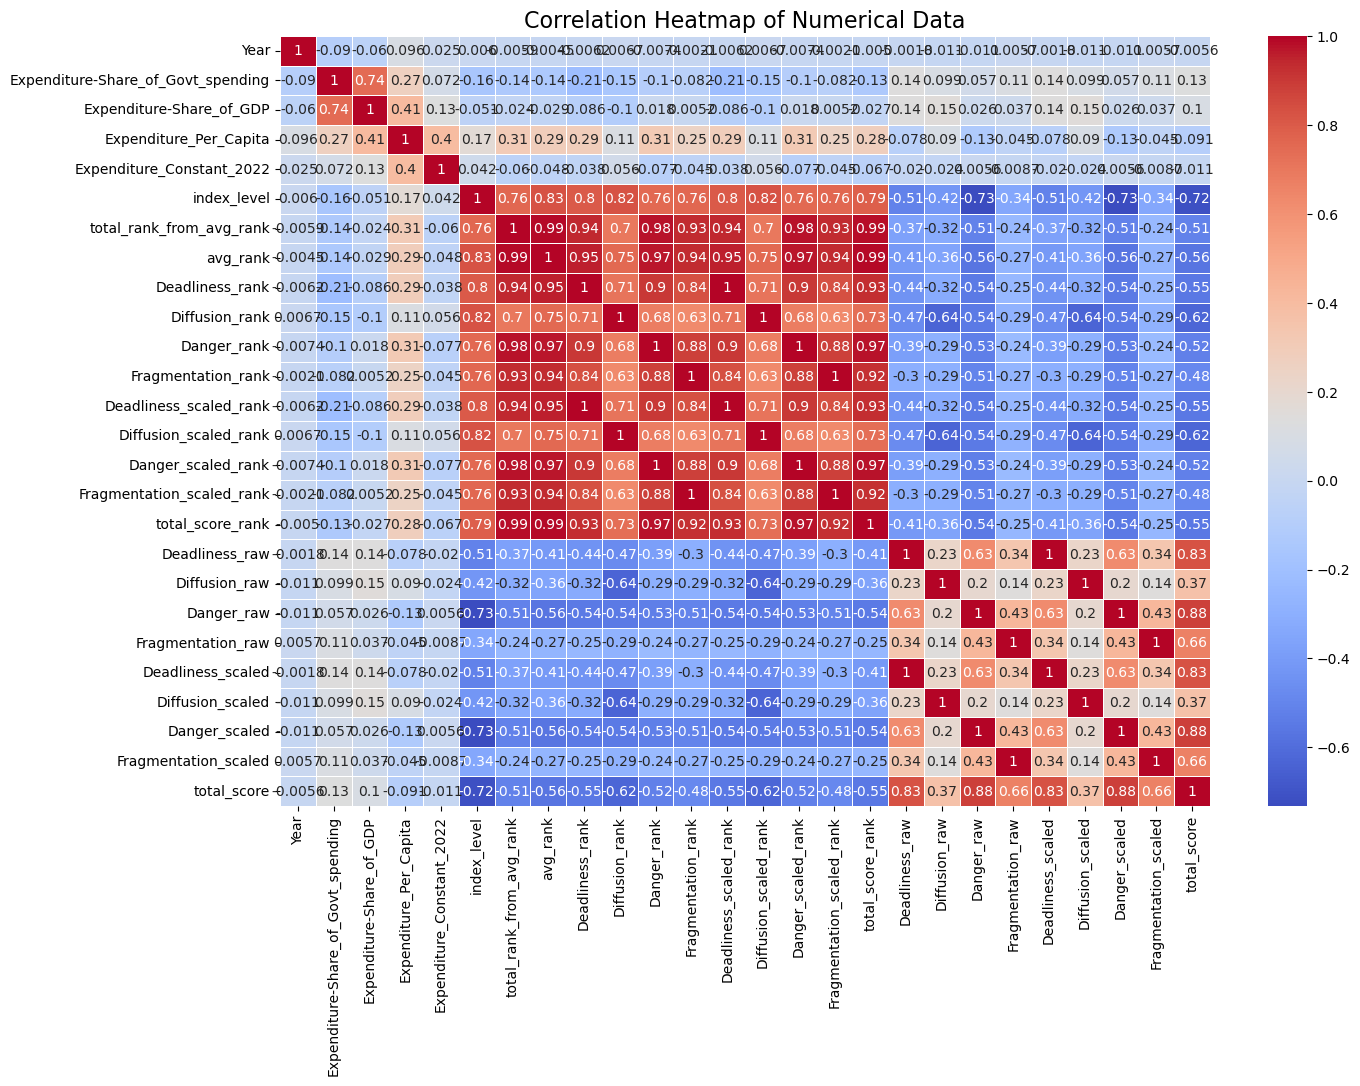

In [6]:
# Generating a correlation heatmap for numerical data

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Data', size=16)
plt.show()

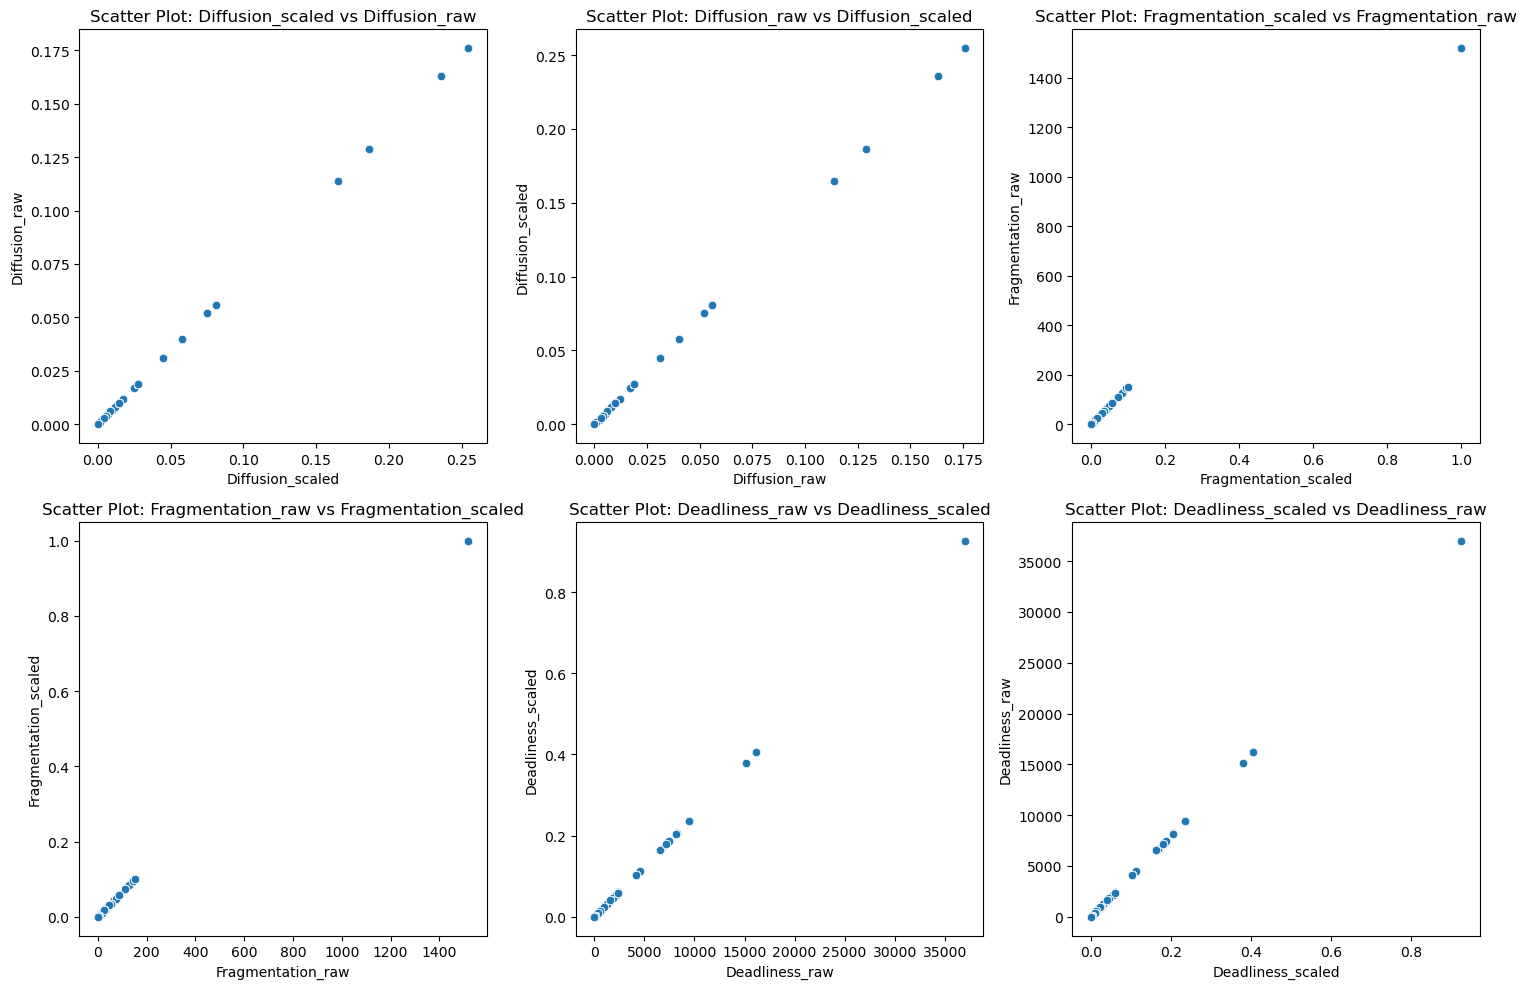

In [7]:
# Identifying highly correlated features (absolute correlation > 0.7)
highly_correlated_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1.0]  # Exclude self-correlation

# Get the top correlated pairs
top_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs > 0.7].index

# Plotting scatter plots for highly correlated feature pairs
plt.figure(figsize=(15, 10))
plot_index = 1
for (feature1, feature2) in top_correlated_pairs:
    if plot_index > 6:  # Limit the number of scatter plots to display
        break
    plt.subplot(2, 3, plot_index)
    sns.scatterplot(data=df, x=feature1, y=feature2)
    plt.title(f'Scatter Plot: {feature1} vs {feature2}')
    plot_index += 1

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [9]:
# Load Dataset
from pathlib import Path
import pandas as pd

# Define the file path
file_path = Path("..") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv"     # Suitable for within Github repository
# file_path = 'Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'                         # for when working in same directory

# Load the CSV file
data = pd.read_csv(file_path)
                       
data.head()         

,Country,Year,Expenditure-Share_of_Govt_spending,Expenditure-Share_of_GDP,Expenditure_Per_Capita,Expenditure_Constant_2022,Region,Subregion,index_level,total_rank_from_avg_rank,...,total_score_rank,Deadliness_raw,Diffusion_raw,Danger_raw,Fragmentation_raw,Deadliness_scaled,Diffusion_scaled,Danger_scaled,Fragmentation_scaled,total_score
0,Brazil,2000,NaN,0.017307,64.500907,15643.43168,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
1,Brazil,2001,0.047167,0.019519,61.332747,18119.43481,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
2,Brazil,2002,0.041112,0.018958,53.550103,18361.33076,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
3,Brazil,2003,0.035175,0.015035,45.956041,14647.82954,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
4,Brazil,2004,0.035561,0.014613,52.945029,15219.74744,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851


### Data Cleaning for Regression Models

In [10]:
# Drop the columns that are not relevant for the forecasting model as mentioned by the user
columns_to_drop = [
    'Deadliness_scaled', 'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled',
    'Deadliness_rank', 'Diffusion_rank', 'Danger_rank', 'Fragmentation_rank'
]
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Display the cleaned dataset to check the changes
data_cleaned.head()

,Country,Year,Expenditure-Share_of_Govt_spending,Expenditure-Share_of_GDP,Expenditure_Per_Capita,Expenditure_Constant_2022,Region,Subregion,index_level,total_rank_from_avg_rank,...,Deadliness_scaled_rank,Diffusion_scaled_rank,Danger_scaled_rank,Fragmentation_scaled_rank,total_score_rank,Deadliness_raw,Diffusion_raw,Danger_raw,Fragmentation_raw,total_score
0,Brazil,2000,NaN,0.017307,64.500907,15643.43168,Americas,South America,1,6,...,10,31,3,9,6,6678,0.003,4117,67,0.851
1,Brazil,2001,0.047167,0.019519,61.332747,18119.43481,Americas,South America,1,6,...,10,31,3,9,6,6678,0.003,4117,67,0.851
2,Brazil,2002,0.041112,0.018958,53.550103,18361.33076,Americas,South America,1,6,...,10,31,3,9,6,6678,0.003,4117,67,0.851
3,Brazil,2003,0.035175,0.015035,45.956041,14647.82954,Americas,South America,1,6,...,10,31,3,9,6,6678,0.003,4117,67,0.851
4,Brazil,2004,0.035561,0.014613,52.945029,15219.74744,Americas,South America,1,6,...,10,31,3,9,6,6678,0.003,4117,67,0.851


In [11]:
# Check for missing values in the cleaned dataset
missing_values = data_cleaned.isna().sum()

# Display the columns with missing values and the count of missing values
missing_values[missing_values > 0]

Expenditure-Share_of_Govt_spending    183
Expenditure-Share_of_GDP              114
Expenditure_Per_Capita                112
Expenditure_Constant_2022              43
dtype: int64

In [12]:
# Create a copy of the dataframe to avoid modifying the original data
data_cleaned = data_cleaned.copy()

# Handling missing values in "Expenditure_Constant_2022" using forward and backward filling
data_cleaned['Expenditure_Constant_2022'] = data_cleaned['Expenditure_Constant_2022'].ffill().bfill()

# Handling missing values in other numerical columns using median imputation
for column in ['Expenditure-Share_of_Govt_spending', 'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita']:
    median_value = data_cleaned[column].median()
    data_cleaned[column] = data_cleaned[column].fillna(median_value)

# Verify that there are no missing values left in the dataset
missing_values_after_imputation = data_cleaned.isna().sum()
missing_values_after_imputation[missing_values_after_imputation > 0]

Series([], dtype: int64)

Supervised Learning (Regression)

### Linear Regression Model 1

In [13]:
# Selecting relevant features for forecasting
# We will primarily use 'Year' and 'Expenditure_Constant_2022' for the time-series analysis.
forecast_data = data_cleaned[['Country', 'Year', 'Expenditure_Constant_2022']]

# Sorting the data by Country and Year to prepare for time-series modeling
forecast_data = forecast_data.sort_values(by=['Country', 'Year'])

# Display the prepared data for forecasting
forecast_data.head()

,Country,Year,Expenditure_Constant_2022
619,Afghanistan,2004,183.648324
620,Afghanistan,2005,165.378054
621,Afghanistan,2006,167.189480
622,Afghanistan,2007,257.366345
623,Afghanistan,2008,224.292155


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for each country
# We will create a dictionary to hold the train-test split for each country
countries = forecast_data['Country'].unique()
train_test_data = {}

for country in countries:
    country_data = forecast_data[forecast_data['Country'] == country]
    X = country_data[['Year']]
    y = country_data['Expenditure_Constant_2022']
    
    # Split the data (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    train_test_data[country] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

# Display the train-test split information for a sample country
sample_country = countries[0]
train_test_data[sample_country]

{'X_train':      Year
 619  2004
 620  2005
 621  2006
 622  2007
 623  2008
 624  2009
 625  2010
 626  2011
 627  2012
 628  2013
 629  2014
 630  2015
 631  2016
 632  2017,
 'X_test':      Year
 633  2018
 634  2019
 635  2020
 636  2021,
 'y_train': 619    183.648324
 620    165.378054
 621    167.189480
 622    257.366345
 623    224.292155
 624    252.407949
 625    269.912673
 626    265.485040
 627    198.955803
 628    183.421702
 629    223.721970
 630    178.913871
 631    177.240056
 632    174.272685
 Name: Expenditure_Constant_2022, dtype: float64,
 'y_test': 633    190.335314
 634    228.106548
 635    263.904202
 636    268.600635
 Name: Expenditure_Constant_2022, dtype: float64}

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize a dictionary to store the models for each country
models = {}

# Train a Linear Regression model for each country
for country in countries:
    # Extract train-test data for the current country
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    
    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Store the trained model
    models[country] = model

# Forecast the next 5 and 10 years for each country using the trained models
forecast_years_5 = pd.DataFrame({'Year': np.arange(2022, 2027)})
forecast_years_10 = pd.DataFrame({'Year': np.arange(2022, 2032)})

# Create a dictionary to store forecasts for each country
forecasts = {}

for country in countries:
    # Use the trained model to make predictions for the next 5 and 10 years
    model = models[country]
    forecast_5 = model.predict(forecast_years_5)
    forecast_10 = model.predict(forecast_years_10)
    
    forecasts[country] = {
        '5_year_forecast': forecast_5,
        '10_year_forecast': forecast_10
    }

# Display the forecast for the first country as a sample
forecasts[sample_country]

{'5_year_forecast': array([196.33102894, 195.25294383, 194.17485873, 193.09677362,
        192.01868852]),
 '10_year_forecast': array([196.33102894, 195.25294383, 194.17485873, 193.09677362,
        192.01868852, 190.94060342, 189.86251831, 188.78443321,
        187.70634811, 186.628263  ])}

C:\Users\carri\AppData\Local\Temp\ipykernel_33844\1077236069.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_expenditure = forecast_data.groupby('Country', group_keys=False).apply(


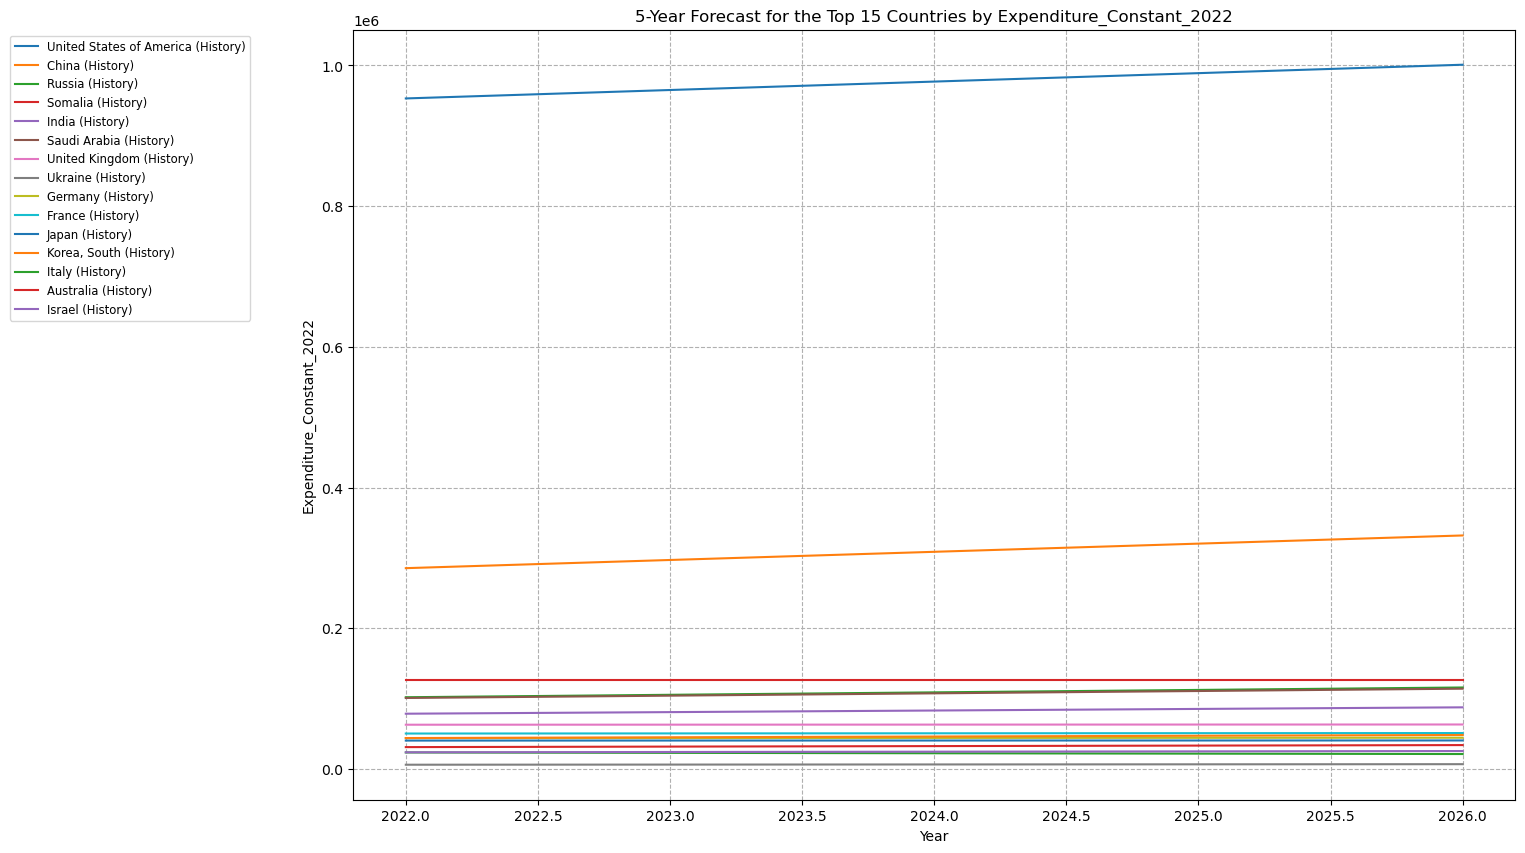

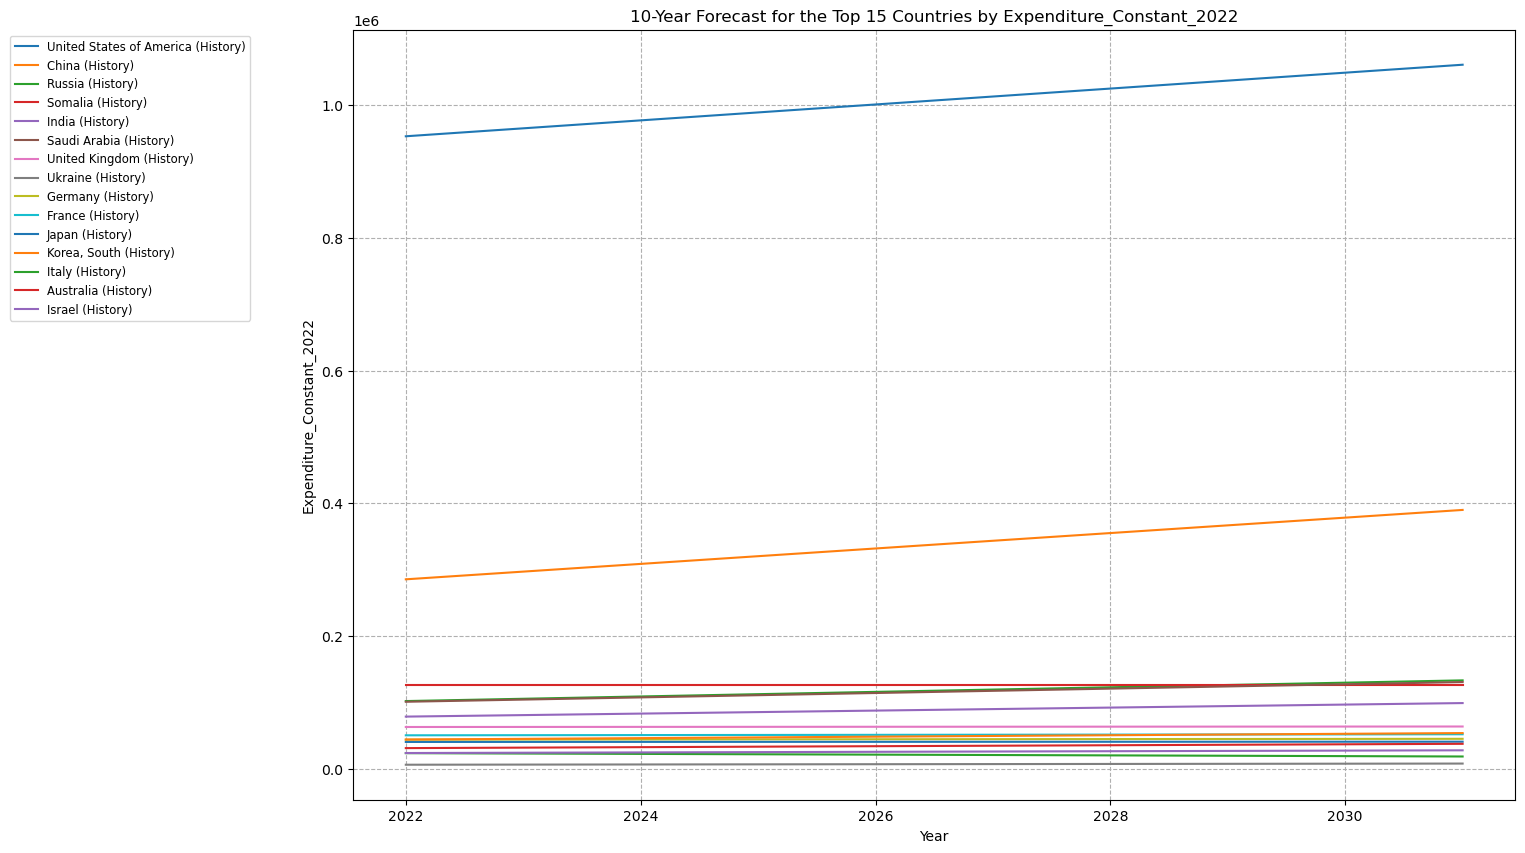

In [45]:
# Get the most recent "Expenditure_Constant_2022" for each country
latest_expenditure = forecast_data.groupby('Country', group_keys=False).apply(
    lambda x: x.loc[x['Year'] == x['Year'].max(), 'Expenditure_Constant_2022'].values[0]
)

# Sort and select the top 15 countries
top_15_countries = latest_expenditure.sort_values(ascending=False).head(15).index

# Plotting the 5-year forecast for the top 15 countries
plt.figure(figsize=(15, 10))
for country in top_15_countries:
    years = np.arange(2022, 2027)
    expenditure_forecast = forecasts[country]['5_year_forecast']
    plt.plot(years, expenditure_forecast, label=country)

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('5-Year Forecast for the Top 15 Countries by Expenditure_Constant_2022')
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

# Plotting the 10-year forecast for the top 15 countries
plt.figure(figsize=(15, 10))
for country in top_15_countries:
    years = np.arange(2022, 2032)
    expenditure_forecast = forecasts[country]['10_year_forecast']
    plt.plot(years, expenditure_forecast, label=country)

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('10-Year Forecast for the Top 15 Countries by Expenditure_Constant_2022')
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

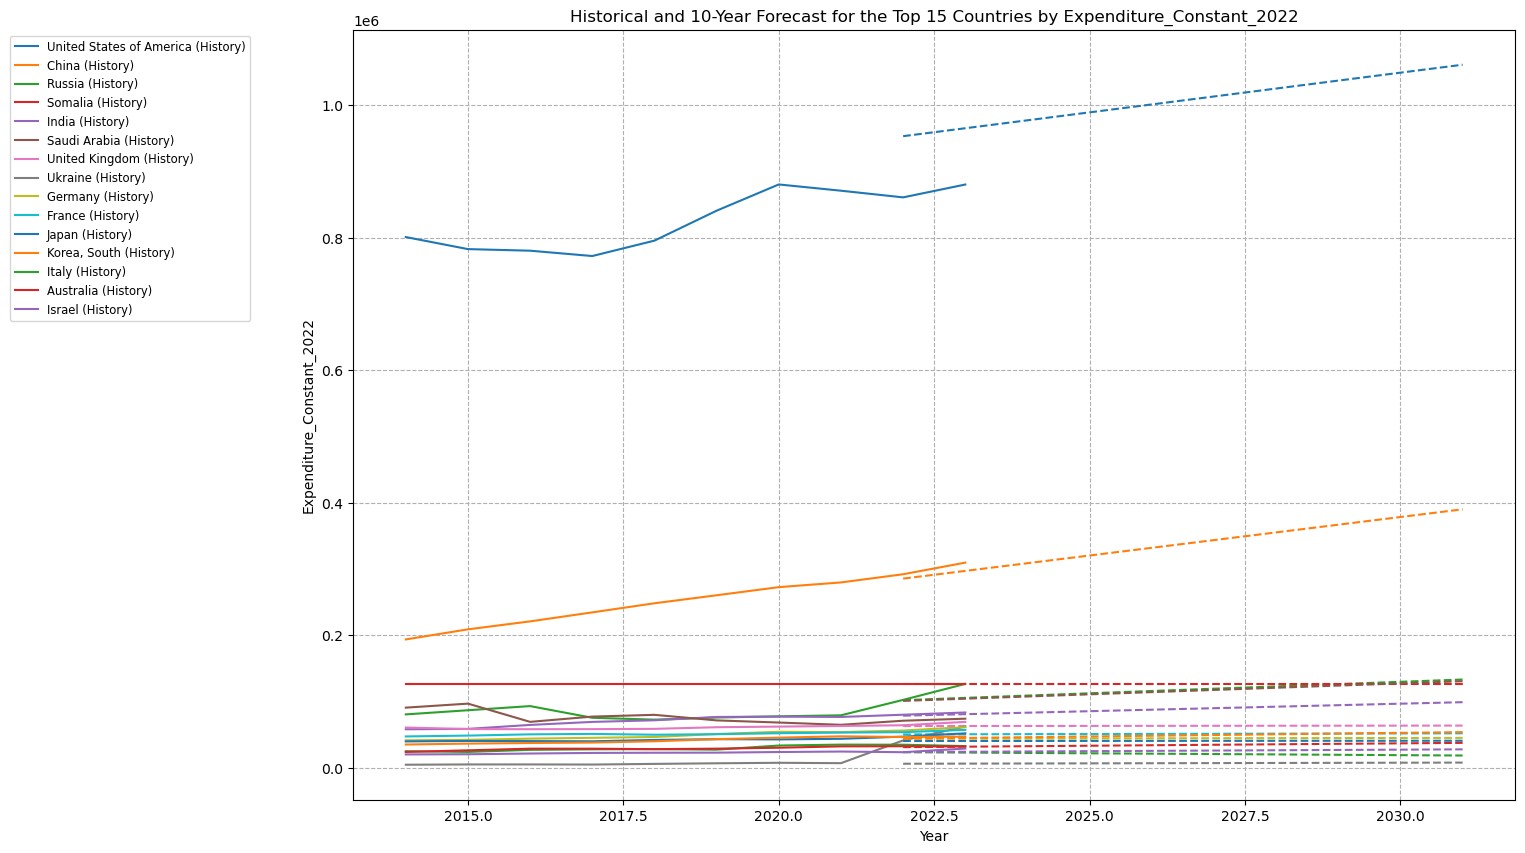

In [46]:
# Sort the top 15 countries by the most recent expenditure level for legend ranking
latest_expenditure_sorted = latest_expenditure[top_15_countries].sort_values(ascending=False)

plt.figure(figsize=(15, 10))

country_lines = []

for country in latest_expenditure_sorted.index:
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    
    # Plot the forecast for the next 10 years with a dashed line, using the same color
    plt.plot(
        np.arange(2022, 2032), forecasts[country]['10_year_forecast'], 
        linestyle='--', color=historical_line.get_color(), label=f'{country} (Forecast)'
    )
    
    # Store reference for legend sorting
    country_lines.append((country, historical_line))

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in sorted(country_lines, key=lambda x: latest_expenditure_sorted[country], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('Historical and 10-Year Forecast for the Top 15 Countries by Expenditure_Constant_2022')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

In [18]:
# Displaying the formulas (coefficients and intercepts) of the Linear Regression models for each country

# Store the forecast formulas for each of the top 15 countries
forecast_formulas = {}

for country in top_15_countries:
    # Extract the model for the current country
    model = models[country]
    
    # Get the coefficient (slope) and intercept of the linear regression model
    coefficient = model.coef_[0]
    intercept = model.intercept_
    
    # Store the formula
    forecast_formulas[country] = f"Expenditure_Constant_2022 = {coefficient:.2f} * Year + {intercept:.2f}"

# Display the forecast formulas for the top 15 countries
forecast_formulas

{'United States of America': 'Expenditure_Constant_2022 = 11981.00 * Year + -23272546.56',
 'China': 'Expenditure_Constant_2022 = 11618.69 * Year + -23207588.84',
 'Russia': 'Expenditure_Constant_2022 = 3464.69 * Year + -6903680.88',
 'Somalia': 'Expenditure_Constant_2022 = 0.00 * Year + 126473.35',
 'India': 'Expenditure_Constant_2022 = 2265.94 * Year + -4503217.61',
 'Saudi Arabia': 'Expenditure_Constant_2022 = 3301.45 * Year + -6574677.22',
 'United Kingdom': 'Expenditure_Constant_2022 = 81.02 * Year + -100966.65',
 'Ukraine': 'Expenditure_Constant_2022 = 194.25 * Year + -386780.27',
 'Germany': 'Expenditure_Constant_2022 = 135.10 * Year + -229344.53',
 'France': 'Expenditure_Constant_2022 = 174.92 * Year + -303368.71',
 'Japan': 'Expenditure_Constant_2022 = 43.12 * Year + -46864.64',
 'Korea, South': 'Expenditure_Constant_2022 = 1086.85 * Year + -2153701.90',
 'Italy': 'Expenditure_Constant_2022 = -558.10 * Year + 1151893.60',
 'Australia': 'Expenditure_Constant_2022 = 719.24 * Yea

In [19]:
from sklearn.metrics import r2_score

# Prepare a list to store the country, coefficient, intercept, and R^2 values
model_summary = []

# Calculate the R^2 score for each of the top 15 countries
for country in top_15_countries:
    # Extract model and train-test data for the current country
    model = models[country]
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    X_test = train_test_data[country]['X_test']
    y_test = train_test_data[country]['y_test']
    
    # Get the coefficient and intercept
    coefficient = model.coef_[0]
    intercept = model.intercept_
    
    # Calculate the R^2 score on the test data
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    
    # Append the summary to the list
    model_summary.append({
        'Country': country,
        'Coefficient': coefficient,
        'Intercept': intercept,
        'R^2 Score': r_squared
    })

# Create a DataFrame to display the model summary
model_summary_df = pd.DataFrame(model_summary)

# Display the model summary
model_summary_df

,Country,Coefficient,Intercept,R^2 Score
0,United States of America,11981.001032,-2.327255e+07,-25.457937
1,China,11618.685787,-2.320759e+07,0.694556
2,Russia,3464.692816,-6.903681e+06,0.290156
3,Somalia,0.000000,1.264734e+05,1.000000
4,India,2265.937042,-4.503218e+06,-0.237510
5,Saudi Arabia,3301.454063,-6.574677e+06,-78.910826
6,United Kingdom,81.022005,-1.009666e+05,-0.080564
7,Ukraine,194.253952,-3.867803e+05,-0.674017
8,Germany,135.101688,-2.293445e+05,-11.194959
9,France,174.924374,-3.033687e+05,-1.866650


### Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a dictionary to store the Random Forest models for each country
rf_models = {}

# Train a Random Forest Regressor for each country
for country in top_15_countries:
    # Extract train-test data for the current country
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    
    # Initialize and train the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Store the trained model
    rf_models[country] = rf_model

# Forecast the next 10 years for each country using the trained Random Forest models
rf_forecasts = {}

for country in top_15_countries:
    # Use the trained model to make predictions for the next 10 years
    rf_model = rf_models[country]
    forecast_10 = rf_model.predict(forecast_years_10)
    
    rf_forecasts[country] = {
        '10_year_forecast': forecast_10
    }

# Display the forecast for one of the top 15 countries
sample_country = top_15_countries[0]
rf_forecasts[sample_country]

{'10_year_forecast': array([789481.619213, 789481.619213, 789481.619213, 789481.619213,
        789481.619213, 789481.619213, 789481.619213, 789481.619213,
        789481.619213, 789481.619213])}

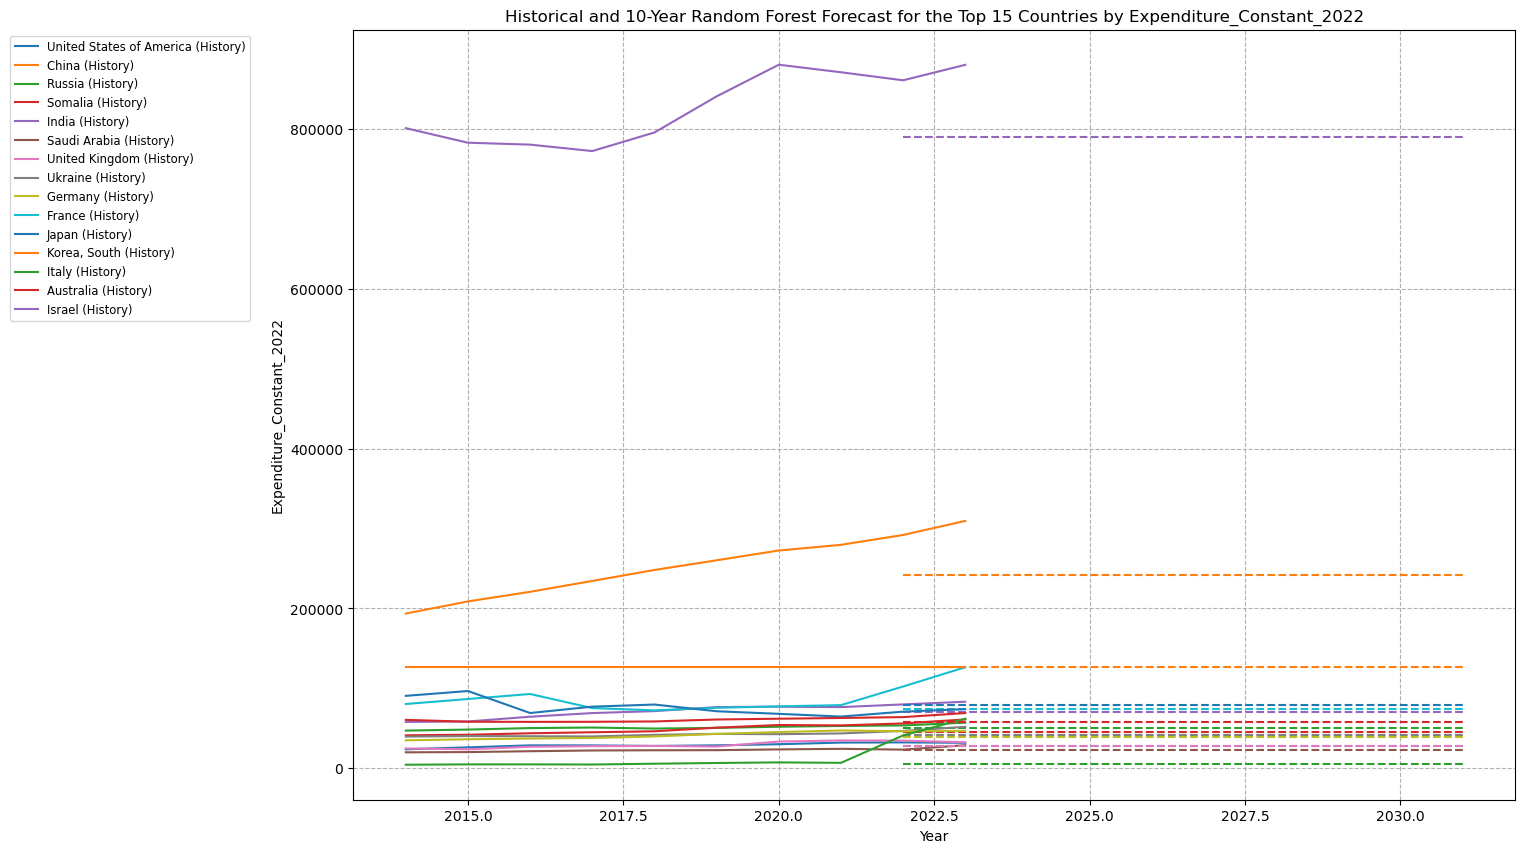

In [47]:
# Plotting the historical data (last 10 years) and the 10-year Random Forest forecast for the top 15 countries with consistent colors

plt.figure(figsize=(15, 10))

for country in sorted(top_15_countries):
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    
    # Plot the Random Forest forecast for the next 10 years with a dashed line, using the same color
    forecast_years = np.arange(2022, 2032)
    expenditure_forecast = rf_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, expenditure_forecast, linestyle='--', color=historical_line.get_color(), label=f'{country} (RF Forecast)'
    )

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in sorted(country_lines, key=lambda x: latest_expenditure_sorted[x[0]], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('Historical and 10-Year Random Forest Forecast for the Top 15 Countries by Expenditure_Constant_2022')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

#### Compare model accuracy between Linear and Random

In [22]:
# Prepare a list to store the comparison of R^2 scores for Linear Regression and Random Forest for each country
model_comparison = []

# Calculate the R^2 score for each of the top 15 countries for both Linear Regression and Random Forest models
for country in top_15_countries:
    # Extract train-test data for the current country
    X_test = train_test_data[country]['X_test']
    y_test = train_test_data[country]['y_test']
    
    # Linear Regression R^2 Score
    linear_model = models[country]
    y_pred_linear = linear_model.predict(X_test)
    r_squared_linear = r2_score(y_test, y_pred_linear)
    
    # Random Forest R^2 Score
    rf_model = rf_models[country]
    y_pred_rf = rf_model.predict(X_test)
    r_squared_rf = r2_score(y_test, y_pred_rf)
    
    # Append the comparison to the list
    model_comparison.append({
        'Country': country,
        'Linear R^2 Score': r_squared_linear,
        'Random Forest R^2 Score': r_squared_rf
    })

# Create a DataFrame to display the model comparison
model_comparison_df = pd.DataFrame(model_comparison)

model_comparison_df

,Country,Linear R^2 Score,Random Forest R^2 Score
0,United States of America,-25.457937,-27.102278
1,China,0.694556,-5.880555
2,Russia,0.290156,-0.794920
3,Somalia,1.000000,0.000000
4,India,-0.237510,-10.619484
5,Saudi Arabia,-78.910826,-8.238869
6,United Kingdom,-0.080564,-3.584137
7,Ukraine,-0.674017,-0.720477
8,Germany,-11.194959,-7.560721
9,France,-1.866650,-2.222828


In [23]:
# Prepare a list to store the summary of the Random Forest model's intercept (using the mean), coefficient approximation (feature importance), and R^2 for each country
rf_model_summary = []

# Calculate the intercept (mean value), approximate coefficient, and R^2 score for each of the top 15 countries
for country in top_15_countries:
    # Extract the Random Forest model and train-test data for the current country
    rf_model = rf_models[country]
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    X_test = train_test_data[country]['X_test']
    y_test = train_test_data[country]['y_test']
    
    # Calculate the intercept as the mean of the target value
    intercept = y_train.mean()
    
    # Approximate the "coefficient" as feature importance (since Random Forest doesn't directly provide coefficients)
    feature_importance = rf_model.feature_importances_[0]
    
    # Calculate the R^2 score on the test data
    y_pred = rf_model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    
    # Append the summary to the list
    rf_model_summary.append({
        'Country': country,
        'Approximate Coefficient (Feature Importance)': feature_importance,
        'Intercept (Mean Value)': intercept,
        'R^2 Score': r_squared
    })

# Create a DataFrame to display the model summary
rf_model_summary_df = pd.DataFrame(rf_model_summary)

rf_model_summary_df


,Country,Approximate Coefficient (Feature Importance),Intercept (Mean Value),R^2 Score
0,United States of America,1.0,797284.510632,-27.102278
1,China,1.0,134350.906012,-5.880555
2,Russia,1.0,56886.987055,-0.794920
3,Somalia,0.0,126473.354300,0.000000
4,India,1.0,49049.911387,-10.619484
5,Saudi Arabia,1.0,57943.995012,-8.238869
6,United Kingdom,1.0,61806.560849,-3.584137
7,Ukraine,1.0,3475.918031,-0.720477
8,Germany,1.0,42074.764294,-7.560721
9,France,1.0,48054.356989,-2.222828


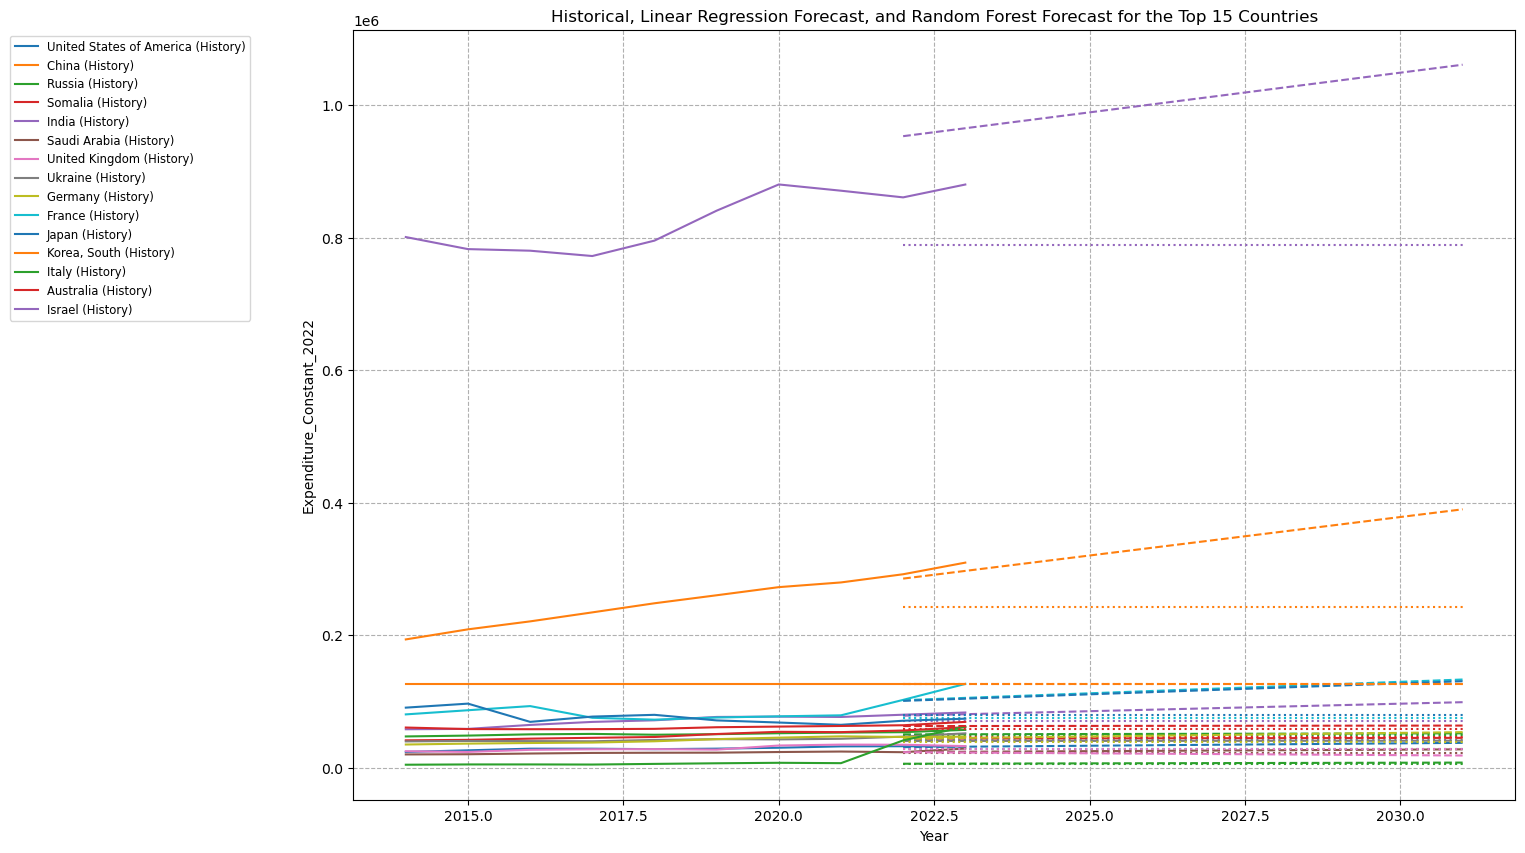

In [48]:
# Plotting the historical data, Linear Regression forecast, and Random Forest forecast for the top 15 countries with consistent colors

plt.figure(figsize=(15, 10))

for country in sorted(top_15_countries):
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    
    # Plot the Linear Regression forecast for the next 10 years with a dashed line
    linear_forecast_years = np.arange(2022, 2032)
    linear_expenditure_forecast = forecasts[country]['10_year_forecast']
    plt.plot(
        linear_forecast_years, linear_expenditure_forecast, linestyle='--', color=historical_line.get_color(), 
        label=f'{country} (Linear Forecast)'
    )
    
    # Plot the Random Forest forecast for the next 10 years with a dotted line
    rf_expenditure_forecast = rf_forecasts[country]['10_year_forecast']
    plt.plot(
        linear_forecast_years, rf_expenditure_forecast, linestyle=':', color=historical_line.get_color(), 
        label=f'{country} (RF Forecast)'
    )

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in sorted(country_lines, key=lambda x: latest_expenditure_sorted[x[0]], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('Historical, Linear Regression Forecast, and Random Forest Forecast for the Top 15 Countries')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

### Gradient Boosting Regressor Model

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize a dictionary to store the Gradient Boosting models for each country
gbr_models = {}

# Train a Gradient Boosting Regressor for each country
for country in top_15_countries:
    # Extract train-test data for the current country
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    
    # Initialize and train the Gradient Boosting Regressor
    gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbr_model.fit(X_train, y_train)
    
    # Store the trained model
    gbr_models[country] = gbr_model

# Forecast the next 10 years for each country using the trained Gradient Boosting models
gbr_forecasts = {}

for country in top_15_countries:
    # Use the trained model to make predictions for the next 10 years
    gbr_model = gbr_models[country]
    forecast_10 = gbr_model.predict(forecast_years_10)
    
    gbr_forecasts[country] = {
        '10_year_forecast': forecast_10
    }

# Display the forecast for the first country as a sample
gbr_forecasts[sample_country]

{'10_year_forecast': array([795404.95804064, 795404.95804064, 795404.95804064, 795404.95804064,
        795404.95804064, 795404.95804064, 795404.95804064, 795404.95804064,
        795404.95804064, 795404.95804064])}

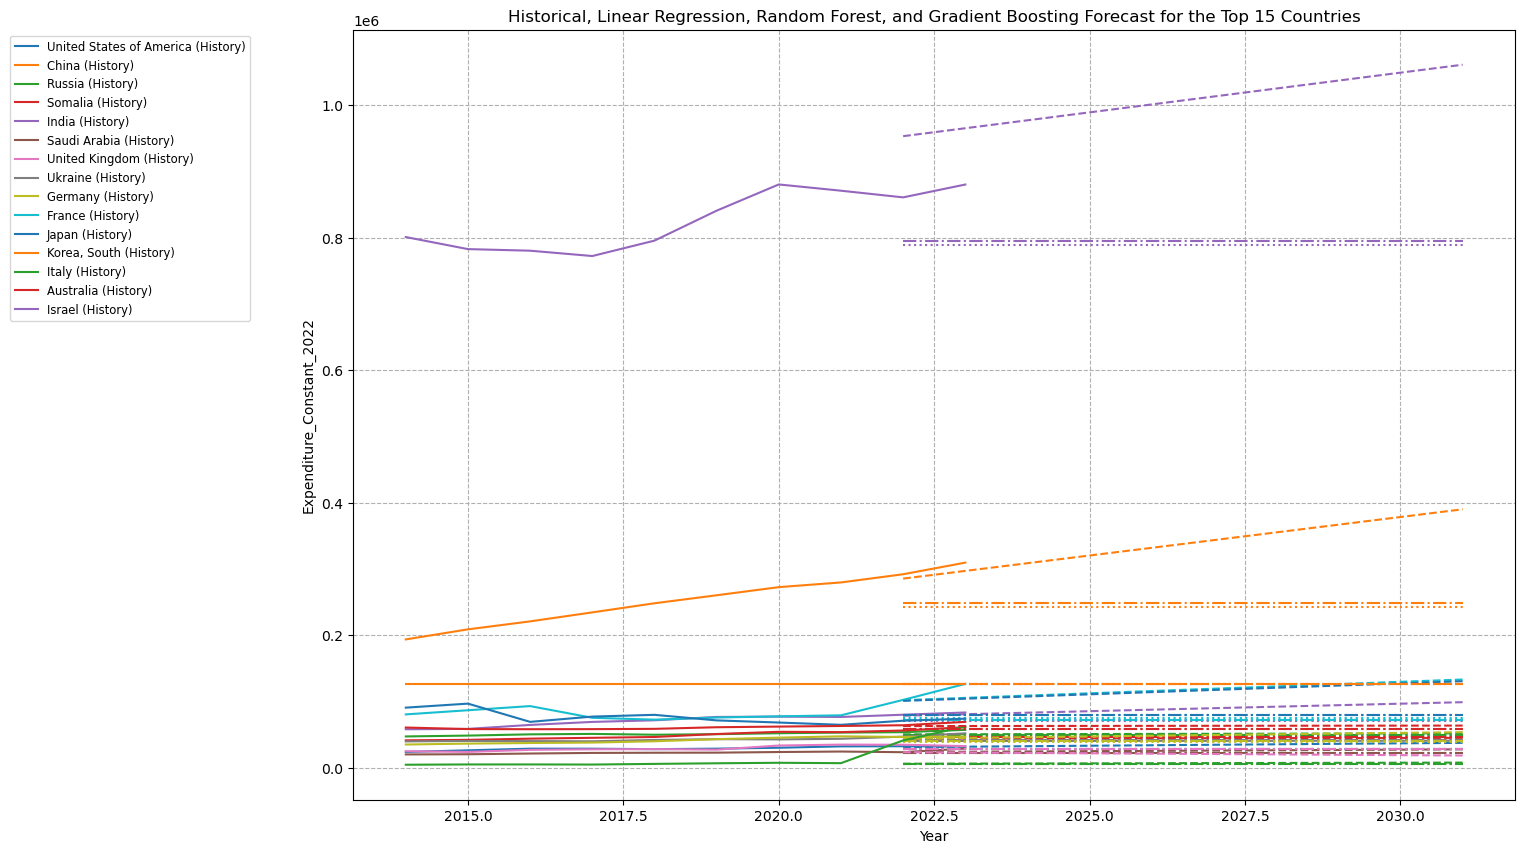

In [49]:
# Plotting the historical data, Linear Regression forecast, Random Forest forecast, and Gradient Boosting Regressor forecast for the top 15 countries

plt.figure(figsize=(15, 10))

for country in sorted(top_15_countries):
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    
    # Plot the Linear Regression forecast for the next 10 years with a dashed line
    forecast_years = np.arange(2022, 2032)
    linear_expenditure_forecast = forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, linear_expenditure_forecast, linestyle='--', color=historical_line.get_color(), 
        label=f'{country} (Linear Forecast)'
    )
    
    # Plot the Random Forest forecast for the next 10 years with a dotted line
    rf_expenditure_forecast = rf_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, rf_expenditure_forecast, linestyle=':', color=historical_line.get_color(), 
        label=f'{country} (RF Forecast)'
    )
    
    # Plot the Gradient Boosting Regressor forecast for the next 10 years with a dash-dot line
    gbr_expenditure_forecast = gbr_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, gbr_expenditure_forecast, linestyle='-.', color=historical_line.get_color(), 
        label=f'{country} (GBR Forecast)'
    )

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in sorted(country_lines, key=lambda x: latest_expenditure_sorted[x[0]], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('Historical, Linear Regression, Random Forest, and Gradient Boosting Forecast for the Top 15 Countries')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

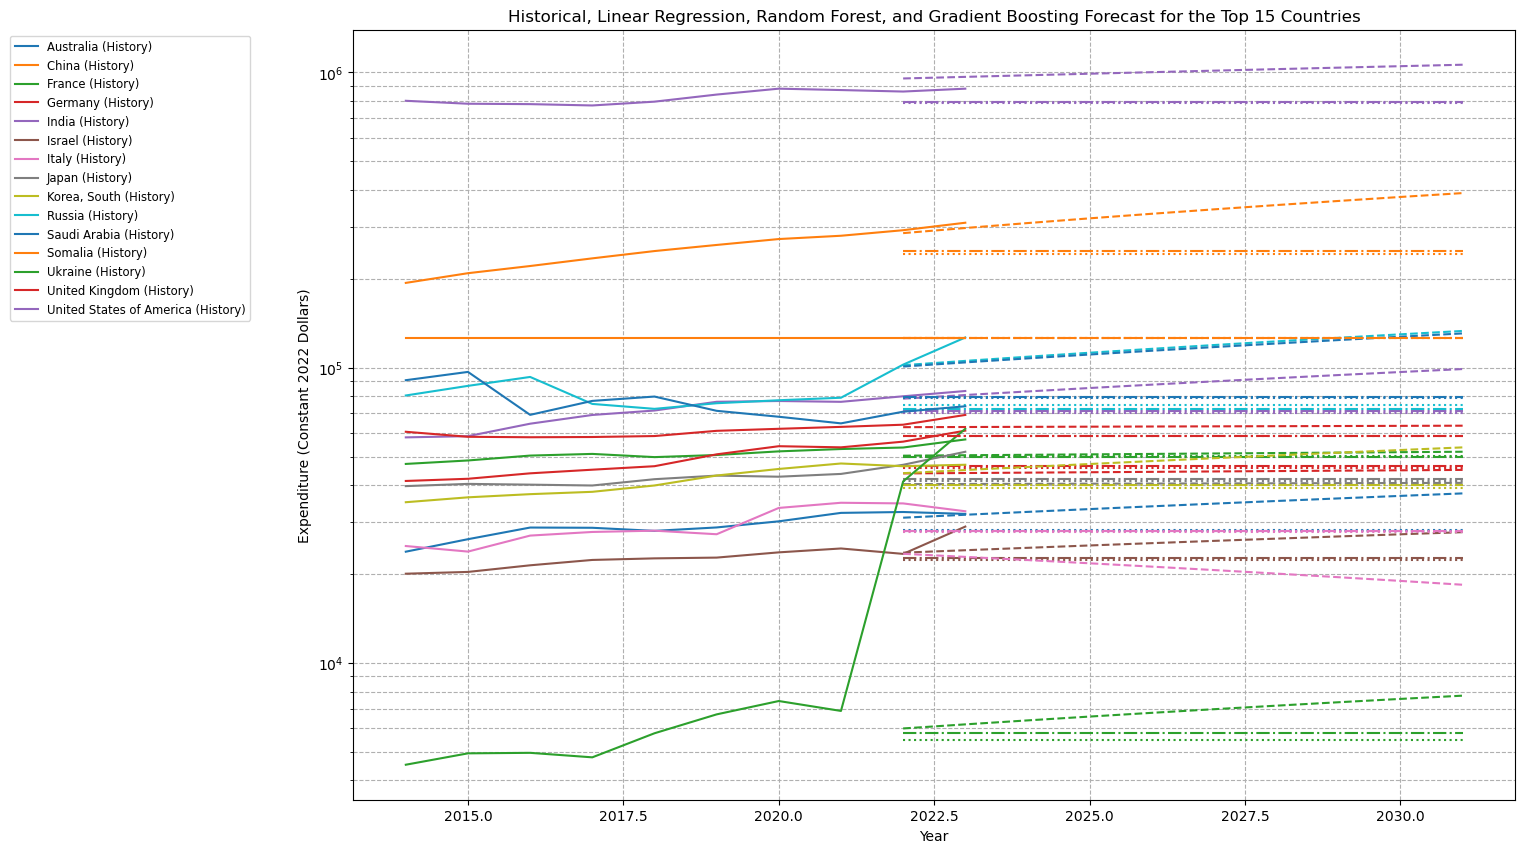

In [50]:
# Plotting the historical data, Linear Regression forecast, Random Forest forecast, and Gradient Boosting Regressor forecast for the top 15 countries

plt.figure(figsize=(15, 10))

country_lines = []  # To store line references for sorting later

for country in sorted(top_15_countries):
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    country_lines.append((country, historical_line))  # Storing line reference for legend sorting

    # Plot the Linear Regression forecast for the next 10 years with a dashed line
    forecast_years = np.arange(2022, 2032)
    linear_expenditure_forecast = forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, linear_expenditure_forecast, linestyle='--', color=historical_line.get_color(), 
        label=f'{country} (Linear Forecast)'
    )
    
    # Plot the Random Forest forecast for the next 10 years with a dotted line
    rf_expenditure_forecast = rf_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, rf_expenditure_forecast, linestyle=':', color=historical_line.get_color(), 
        label=f'{country} (RF Forecast)'
    )
    
    # Plot the Gradient Boosting Regressor forecast for the next 10 years with a dash-dot line
    gbr_expenditure_forecast = gbr_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, gbr_expenditure_forecast, linestyle='-.', color=historical_line.get_color(), 
        label=f'{country} (GBR Forecast)'
    )

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in sorted(country_lines, key=lambda x: historical_expenditure.iloc[-1], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure (Constant 2022 Dollars)')
plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.title('Historical, Linear Regression, Random Forest, and Gradient Boosting Forecast for the Top 15 Countries')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which='both', linestyle='--')  # Adding gridlines for better readability
plt.show()

In [51]:
# Prepare a list to store the summary of the Gradient Boosting model's R^2 for each country
gbr_model_summary = []

# Calculate the R^2 score for each of the top 15 countries for the Gradient Boosting model
for country in top_15_countries:
    # Extract train-test data for the current country
    X_test = train_test_data[country]['X_test']
    y_test = train_test_data[country]['y_test']
    
    # Gradient Boosting Regressor R^2 Score
    gbr_model = gbr_models[country]
    y_pred_gbr = gbr_model.predict(X_test)
    r_squared_gbr = r2_score(y_test, y_pred_gbr)
    
    # Append the summary to the list
    gbr_model_summary.append({
        'Country': country,
        'Gradient Boosting R^2 Score': r_squared_gbr
    })

# Create a DataFrame to display the Gradient Boosting model accuracy summary
gbr_model_summary_df = pd.DataFrame(gbr_model_summary)

gbr_model_summary_df

,Country,Gradient Boosting R^2 Score
0,United States of America,-23.091954
1,China,-4.215515
2,Russia,-1.005995
3,Somalia,1.000000
4,India,-7.432400
5,Saudi Arabia,-10.015545
6,United Kingdom,-3.439904
7,Ukraine,-0.697479
8,Germany,-6.679121
9,France,-2.599453


In [31]:
# Prepare a list to store the summary of theGradient Boosting model's intercept (using the mean), coefficient approximation (feature importance), and R^2 for each country

gbr_summary_list = []  # List to store summaries for each country

for country, gbr_model in gbr_models.items():
    # Calculate the mean of predictions as an approximation for the intercept
    mean_intercept = np.mean(gbr_model.predict(X_train))  # Assuming X_train contains the historical features

    # Get feature importances from the Gradient Boosting model
    feature_importance = gbr_model.feature_importances_

    # Calculate the R^2 score of the model
    r_squared = gbr_model.score(X_train, y_train)

    # Prepare a dictionary for the current country's summary
    country_summary = {
        'Country': country,
        'Mean_Intercept': mean_intercept,
        'Feature_Importance': feature_importance,
        'R_squared': r_squared
    }

    # Append the dictionary to the list
    gbr_summary_list.append(country_summary)

gbr_summary_df = pd.DataFrame(gbr_summary_list)

gbr_summary_df

,Country,Mean_Intercept,Feature_Importance,R_squared
0,United States of America,797284.510632,[1.0],-94132.992031
1,China,134350.906012,[1.0],-2626.882945
2,Russia,56886.987055,[1.0],-277.411792
3,Somalia,126473.354300,[0.0],-1786.684212
4,India,49049.911387,[1.0],-163.153789
5,Saudi Arabia,57943.995012,[1.0],-289.098608
6,United Kingdom,61806.560849,[1.0],-296.795409
7,Ukraine,3475.918031,[1.0],-29.979516
8,Germany,42074.764294,[1.0],-89.737523
9,France,48054.356989,[1.0],-138.682528


#### Hyperparameter grid for Gradient Boosting Regressor

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 5]
}

# Select a subset of countries for demonstration purposes to save computation time
sample_countries = top_15_countries[:3]  # Choosing the first three countries

# Initialize a dictionary to store the best GBR models after hyperparameter tuning
best_gbr_models = {}

# Hyperparameter tuning for each selected country using GridSearchCV
for country in sample_countries:
    # Extract train-test data for the current country
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    
    # Initialize the GBR model
    gbr = GradientBoostingRegressor(random_state=42)
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=1)
    
    # Fit the model to the training data
    grid_search.fit(X_train, y_train)
    
    # Store the best model for the current country
    best_gbr_models[country] = grid_search.best_estimator_

# Display the best parameters for each of the sample countries
best_gbr_parameters = {country: best_gbr_models[country].get_params() for country in sample_countries}
best_gbr_parameters

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'United States of America': {'alpha': 0.9,
  'ccp_alpha': 0.0,
  'criterion': 'friedman_mse',
  'init': None,
  'learning_rate': 0.01,
  'loss': 'squared_error',
  'max_depth': 5,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 50,
  'n_iter_no_change': None,
  'random_state': 42,
  'subsample': 1.0,
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': 0,
  'warm_start': False},
 'China': {'alpha': 0.9,
  'ccp_alpha': 0.0,
  'criterion': 'friedman_mse',
  'init': None,
  'learning_rate': 0.2,
  'loss': 'squared_error',
  'max_depth': 5,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 200,
  'n_iter_no_change': None,
  'random_state': 42,
  'subsample': 1.0,
  'tol': 0.0001,
  'validation_fraction': 0.1,
  '

In [35]:
# Feature selection and data preparation
forecast_data = data_cleaned[['Country', 'Year', 'Expenditure_Constant_2022']].sort_values(by=['Country', 'Year'])

# Train-test split preparation
countries = forecast_data['Country'].unique()
train_test_data = {}
for country in countries:
    country_data = forecast_data[forecast_data['Country'] == country]
    X = country_data[['Year']]
    y = country_data['Expenditure_Constant_2022']
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    train_test_data[country] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

# Redefine the sample countries and manually selected hyperparameter set
sample_countries = countries[:3]
manually_selected_params = {
    'n_estimators': 100,
    'learning_rate': 0.05,
    'max_depth': 3,
    'random_state': 42
}

# Initialize a dictionary to store the manually tuned GBR models for each selected country
manually_tuned_gbr_models = {}

# Train a manually tuned Gradient Boosting Regressor for each selected country
for country in sample_countries:
    # Extract train-test data for the current country
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    
    # Initialize and train the Gradient Boosting Regressor with manually selected parameters
    gbr_model = GradientBoostingRegressor(**manually_selected_params)
    gbr_model.fit(X_train, y_train)
    
    # Store the trained model
    manually_tuned_gbr_models[country] = gbr_model

# Forecast the next 10 years for each country using the manually tuned Gradient Boosting models
forecast_years_10 = pd.DataFrame({'Year': np.arange(2022, 2032)})
manually_tuned_gbr_forecasts = {}

for country in sample_countries:
    # Use the trained model to make predictions for the next 10 years
    gbr_model = manually_tuned_gbr_models[country]
    forecast_10 = gbr_model.predict(forecast_years_10)
    
    manually_tuned_gbr_forecasts[country] = {
        '10_year_forecast': forecast_10
    }

# Display the forecast for the first country as a sample after manual tuning
manually_tuned_gbr_forecasts[sample_countries[0]]


{'10_year_forecast': array([176.17101111, 176.17101111, 176.17101111, 176.17101111,
        176.17101111, 176.17101111, 176.17101111, 176.17101111,
        176.17101111, 176.17101111])}

<div class="alert alert-block alert-info">

**References**

ChatGPT, (2024) GPT-4o version, OpenAI. [Large language model]. https://chatgpt.com/

Gelman, A., & Hill, J. (2006). Data Analysis Using Regression and Multilevel/Hierarchical Models. Cambridge University Press.

Guyon, I., & Elisseeff, A. (2003). An Introduction to Variable and Feature Selection. Journal of Machine Learning Research, 3(Mar), 1157-1182.

Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. OTexts.com/fpp3. 

LinearRegression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Ridge Regression. scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html 

GradientBoostingRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

CountVectorizer. scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Train-Test Split. scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

</div>
